# Panda 
- Stands for **Pan**el-**Da**ta.
- Built upon **NumPy**
- Got 2 main structures: 
    * _Series_: One-dimensional array with labeled index
    * _DataFrame_: Matrice with labeled axes (rows and columns)
    

In [1]:
import warnings
import datetime as dt

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
np.random.seed(42)
warnings.filterwarnings('ignore')

# Series + Df

Serie: is a one dimensional labeled array (one column of information)

Create Series Object from List / Array / Dict

Data are stored in a sequenced order

If an index isn't provided, default numrical values will be assigned

Index are not unique 

Series & DF (in commun): df.index, df.values, df.shape, df.size, df.dtypes

Series object has no attribute info

<span style="color:green"><u>Creating series </u></span> 

`pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)`

In [3]:
## 1. From list

pd.Series(data=['chocolate', 'Vanilla', 'Strawberry'])

0     chocolate
1       Vanilla
2    Strawberry
dtype: object

In [4]:
# Convert Serie to a list
pd.Series(data=['chocolate', 'Vanilla', 'Strawberry']).tolist()

['chocolate', 'Vanilla', 'Strawberry']

In [5]:
## 2. From dict

# It turned the keys into the index labels
# <!> Index is not unique

pd.Series(data={"Celia": 1, "Dehia": 2, "Ilyan": 3, "celia": 43})

Celia     1
Dehia     2
Ilyan     3
celia    43
dtype: int64

In [6]:
## 3. Given data and the index

s = pd.Series(data=[6, 2, 3, None], index=["A", "B", "C", "D"])
s

A    6.0
B    2.0
C    3.0
D    NaN
dtype: float64

In [7]:
# Give all of the available attributes and methods within the object
#
dir(s)

['A',
 'B',
 'C',
 'D',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero_

In [8]:
# Displaying data
s.head()
s.tail()

A    6.0
B    2.0
C    3.0
D    NaN
dtype: float64

In [9]:
# <!> size counts none value
pd.Series(s).ndim, pd.Series(s).shape, pd.Series(s).size, len(s)

(1, (4,), 4, 4)

In [10]:
s.sum(), s.product(), s.mean(), max(s), min(s)

(11.0, 36.0, 3.6666666666666665, 6.0, 2.0)

In [11]:
# values -> ndArray
# O: Object
s.values, s.index, s.dtype

(array([ 6.,  2.,  3., nan]),
 Index(['A', 'B', 'C', 'D'], dtype='object'),
 dtype('float64'))

In [12]:
dict(s), list(s)

({'A': 6.0, 'B': 2.0, 'C': 3.0, 'D': nan}, [6.0, 2.0, 3.0, nan])

In [13]:
pd.Series([2, 4]).is_unique, pd.Series([2, 2]).is_unique

(True, False)

<span style="color:green"><u>Sort series </u></span> 

Use __sort_values__ or __sort_index__ instead of sorted

Use __inplace=True__ to overwrite the object

In [14]:
print(f"Sorted by Pyhton: {sorted(s)}\n")

print(f"Sorted by pd with sort_values:\n{s.sort_values(ascending=True, inplace=False)}\n")

print(f"Sorted by pd with sort_index:\n{s.sort_index(ascending=True, inplace=False)}")

Sorted by Pyhton: [2.0, 3.0, 6.0, nan]

Sorted by pd with sort_values:
B    2.0
C    3.0
A    6.0
D    NaN
dtype: float64

Sorted by pd with sort_index:
A    6.0
B    2.0
C    3.0
D    NaN
dtype: float64


<span style="color:green"><u>Sort Dataframe: </u></span> 

```Python
df.sort_values(by="column", ascending=True, na_position="first", inplace=True)

df.sort_values(by=["column1", "column2"], ascending=True, na_position="last", inplace=False)

df.sort_values(by=["column1", "column2"],, ascending=[True, False], na_position="first")

```

<span style="color:green"><u>Creating dataframe: </u></span> 

In [15]:
data = np.random.randint(-100, 100, (5, 4))

df = pd.DataFrame(data=data, index=['A', 'B', 'C', 'D', 'E'], columns=['W', 'X', 'Y', 'Z'])
df.name = 'Random data'

In [16]:
# Displaying data
df.head(n=4)
df.tail(n=4)

,W,X,Y,Z
B,6,-29,88,-80
C,2,21,-26,-13
D,16,-1,3,51
E,30,49,-48,-99


In [17]:
df.sample(n=3, axis=1, random_state=23)

,X,W,Y
A,79,2,-8
B,-29,6,88
C,21,2,-26
D,-1,16,3
E,49,30,-48


In [18]:
df.sample(frac=.24, random_state=23)

,W,X,Y,Z
E,30,49,-48,-99


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, A to E
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W       5 non-null      int32
 1   X       5 non-null      int32
 2   Y       5 non-null      int32
 3   Z       5 non-null      int32
dtypes: int32(4)
memory usage: 120.0+ bytes


In [20]:
dir(df)

['T',
 'W',
 'X',
 'Y',
 'Z',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',


In [21]:
df.idxmax(), df.idxmin(), df.mode()

(W    E
 X    A
 Y    B
 Z    D
 dtype: object,
 W    A
 X    B
 Y    E
 Z    E
 dtype: object,
      W   X   Y   Z
 0  2.0 -29 -48 -99
 1  NaN  -1 -26 -86
 2  NaN  21  -8 -80
 3  NaN  49   3 -13
 4  NaN  79  88  51)

<span style="color:green"><u>Index: </u></span> 

In [22]:
df.index.get_level_values(0)

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [23]:
df.index.set_names(["FF"], inplace=True)

In [24]:
df.index.get_level_values("FF")

Index(['A', 'B', 'C', 'D', 'E'], dtype='object', name='FF')

In [25]:
df.index.name

'FF'

In [26]:
# Reset index
df = df.reset_index()
df.head(n=7)

,FF,W,X,Y,Z
0,A,2,79,-8,-86
1,B,6,-29,88,-80
2,C,2,21,-26,-13
3,D,16,-1,3,51
4,E,30,49,-48,-99


In [27]:
# Replace index
df['F'] = ['AA', 'BB', 'CC', 'DD', 'EE']
df = df.set_index('F', inplace=False)
df

,FF,W,X,Y,Z
F,,,,,
AA,A,2,79,-8,-86
BB,B,6,-29,88,-80
CC,C,2,21,-26,-13
DD,D,16,-1,3,51
EE,E,30,49,-48,-99


<span style="color:green"><u>Extracting rows: </u></span> 
```
df.loc[['index1', 'index2']]

df.iloc[0] 

df.iloc[0:4]

df.iloc[0, 5]
```

In [28]:
# By index
print(f"{df.index}")
df.loc[['AA', 'BB']] 

Index(['AA', 'BB', 'CC', 'DD', 'EE'], dtype='object', name='F')


,FF,W,X,Y,Z
F,,,,,
AA,A,2,79,-8,-86
BB,B,6,-29,88,-80


In [29]:
# By row
print(f"{df.values}")
df.iloc[0]

[['A' 2 79 -8 -86]
 ['B' 6 -29 88 -80]
 ['C' 2 21 -26 -13]
 ['D' 16 -1 3 51]
 ['E' 30 49 -48 -99]]


FF      A
W       2
X      79
Y      -8
Z     -86
Name: AA, dtype: object

In [30]:
# By row
df.iloc[0: 2]

,FF,W,X,Y,Z
F,,,,,
AA,A,2,79,-8,-86
BB,B,6,-29,88,-80


In [31]:
# By value
df.iloc[0, 0], df.iloc[0, 1], df.iloc[0, 2], df.iloc[1, 4]

('A', 2, 79, -80)

<span style="color:green"><u>Extracting columns: </u></span> 

```Pyhton
df[['column1', 'column2']]
```

In [32]:
df[['W', 'X']]

,W,X
F,,
AA,2,79
BB,6,-29
CC,2,21
DD,16,-1
EE,30,49


<span style="color:green"><u>Extracting rows and columns: </u></span> 
```Pyhton
df.loc[['indx1', 'index2']], ['column1]]
```

In [33]:
df.loc[["AA", "BB"], ['W']]

,W
F,
AA,2
BB,6


<span style="color:green"><u>Iterating on rows DataFrame: </u></span> 

In [34]:
for index, row in df.iterrows():
    print(f"Index: {index}\n"+
          f"Row:\n{row}\n" +
          f"------------\n")

Index: AA
Row:
FF      A
W       2
X      79
Y      -8
Z     -86
Name: AA, dtype: object
------------

Index: BB
Row:
FF      B
W       6
X     -29
Y      88
Z     -80
Name: BB, dtype: object
------------

Index: CC
Row:
FF      C
W       2
X      21
Y     -26
Z     -13
Name: CC, dtype: object
------------

Index: DD
Row:
FF     D
W     16
X     -1
Y      3
Z     51
Name: DD, dtype: object
------------

Index: EE
Row:
FF      E
W      30
X      49
Y     -48
Z     -99
Name: EE, dtype: object
------------



In [35]:
for index, row in df.iterrows():
    print(f"{row['W']:>5} | {row['X']:>2}")
    break

    2 | 79


<span style="color:green"><u>Filters: </u></span>

In [36]:
df[(df['W'] > 0) & (df['Y'] > 1)]
df[(df['W'] > 0) | (df['Y'] > 1)]
df[df['W'].between(10, 39)]

,FF,W,X,Y,Z
F,,,,,
DD,D,16,-1,3,51
EE,E,30,49,-48,-99


In [37]:
df.nlargest(2, columns="W")

,FF,W,X,Y,Z
F,,,,,
EE,E,30,49,-48,-99
DD,D,16,-1,3,51


In [38]:
df.nsmallest(2, columns="W")

,FF,W,X,Y,Z
F,,,,,
AA,A,2,79,-8,-86
CC,C,2,21,-26,-13


In [39]:
# Return all the dataframe, row that are not concerned is in NaN
mask = df == 2
df.where(mask)

,FF,W,X,Y,Z
F,,,,,
AA,NaN,2.0,NaN,NaN,NaN
BB,NaN,NaN,NaN,NaN,NaN
CC,NaN,2.0,NaN,NaN,NaN
DD,NaN,NaN,NaN,NaN,NaN
EE,NaN,NaN,NaN,NaN,NaN


In [40]:
df.isin([3, 16])

,FF,W,X,Y,Z
F,,,,,
AA,False,False,False,False,False
BB,False,False,False,False,False
CC,False,False,False,False,False
DD,False,True,False,True,False
EE,False,False,False,False,False


In [41]:
df.isin({'W': [3, 16]})

,FF,W,X,Y,Z
F,,,,,
AA,False,False,False,False,False
BB,False,False,False,False,False
CC,False,False,False,False,False
DD,False,True,False,False,False
EE,False,False,False,False,False


In [42]:
df

,FF,W,X,Y,Z
F,,,,,
AA,A,2,79,-8,-86
BB,B,6,-29,88,-80
CC,C,2,21,-26,-13
DD,D,16,-1,3,51
EE,E,30,49,-48,-99


<span style="color:green"><u>Query: </u></span>

In [43]:
df.query("X == 21")

,FF,W,X,Y,Z
F,,,,,
CC,C,2,21,-26,-13


In [44]:
df.query("X in ['Sean Connery', 'George Lazenby']")

,FF,W,X,Y,Z
F,,,,,


In [45]:
df.query("X > 3")

,FF,W,X,Y,Z
F,,,,,
AA,A,2,79,-8,-86
CC,C,2,21,-26,-13
EE,E,30,49,-48,-99


<span style="color:green"><u>Stats: </u></span>

In [46]:
df

,FF,W,X,Y,Z
F,,,,,
AA,A,2,79,-8,-86
BB,B,6,-29,88,-80
CC,C,2,21,-26,-13
DD,D,16,-1,3,51
EE,E,30,49,-48,-99


In [47]:
# The mode that represents the value that occurs the most frequently
df.mode()

,FF,W,X,Y,Z
0,A,2.0,-29,-48,-99
1,B,NaN,-1,-26,-86
2,C,NaN,21,-8,-80
3,D,NaN,49,3,-13
4,E,NaN,79,88,51


In [48]:
df.describe()

,W,X,Y,Z
count,5.00000,5.000000,5.000000,5.000000
mean,11.20000,23.800000,1.800000,-45.400000
std,11.96662,42.109381,51.915316,63.366395
min,2.00000,-29.000000,-48.000000,-99.000000
25%,2.00000,-1.000000,-26.000000,-86.000000
50%,6.00000,21.000000,-8.000000,-80.000000
75%,16.00000,49.000000,3.000000,-13.000000
max,30.00000,79.000000,88.000000,51.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, AA to EE
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   FF      5 non-null      object
 1   W       5 non-null      int32 
 2   X       5 non-null      int32 
 3   Y       5 non-null      int32 
 4   Z       5 non-null      int32 
dtypes: int32(4), object(1)
memory usage: 320.0+ bytes


<span style="color:green"><u>Dropna: </u></span>

**dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)**

*axis=1* $\to$ column

*axis=0* $\to$ row

*inplace=True*, instead of re-assigning the DF

*how='all'*, if all values are NA, drop that row or columnn

*how='any* if any NA values are present, drop that row or columnn

In [50]:
df = pd.DataFrame({'A': [1, 5, np.nan, 5, 5],
                   'B': [1, np.nan, np.nan, 5, 5],
                   'C': [1, np.nan, np.nan, 5, 5]})
df

,A,B,C
0,1.0,1.0,1.0
1,5.0,NaN,NaN
2,NaN,NaN,NaN
3,5.0,5.0,5.0
4,5.0,5.0,5.0


In [51]:
df['A'].drop_duplicates(keep=False)

0    1.0
2    NaN
Name: A, dtype: float64

In [52]:
df.drop_duplicates(subset=["A"], keep=False)

,A,B,C
0,1.0,1.0,1.0
2,NaN,NaN,NaN


In [53]:
df.drop_duplicates()

,A,B,C
0,1.0,1.0,1.0
1,5.0,NaN,NaN
2,NaN,NaN,NaN
3,5.0,5.0,5.0


In [54]:
df['A'].duplicated(keep="last")
df['A'].duplicated(keep="first")
df['A'].duplicated(keep=False)

0    False
1     True
2    False
3     True
4     True
Name: A, dtype: bool

In [55]:
mask = ~df['A'].duplicated(keep="first")
df[mask]

,A,B,C
0,1.0,1.0,1.0
1,5.0,NaN,NaN
2,NaN,NaN,NaN


In [56]:
# thresh: More than 2 Nan values to delete a row / column
print(f"Missing values on columns:\n{df.dropna(axis=1, thresh=2)}\n")

print(f"Missing values on rows:\n{df.dropna(axis=0)}\n")
 
print(f"Drop missing values on subset:\n{df.dropna(subset=['A', 'C'])}")

Missing values on columns:
     A    B    C
0  1.0  1.0  1.0
1  5.0  NaN  NaN
2  NaN  NaN  NaN
3  5.0  5.0  5.0
4  5.0  5.0  5.0

Missing values on rows:
     A    B    C
0  1.0  1.0  1.0
3  5.0  5.0  5.0
4  5.0  5.0  5.0

Drop missing values on subset:
     A    B    C
0  1.0  1.0  1.0
3  5.0  5.0  5.0
4  5.0  5.0  5.0


<span style="color:green"><u>Fillna: </u></span>

1. Delete 
1. Mean
1. Mediane
1. Mode (most frequent value)
1. Based on another column 

**DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)** : 

Fill NaN values in specific columns by {backfill, bfill, pad, ffil, None, value}

- **pad / ffill**: propagate last valid observation forward to next valid 
- **backfill / bfill**: use next valid observation to fill gap


Pandas is built on top of numpy, which has neither na nor null values. Instead numpy has NaN (Not a Number) values. 

The 2 functions isna() and isnull() do exactly the same job, they are from R dataframe.

In [57]:
df.isnull()

,A,B,C
0,False,False,False
1,False,True,True
2,True,True,True
3,False,False,False
4,False,False,False


In [58]:
df.isna()

,A,B,C
0,False,False,False
1,False,True,True
2,True,True,True
3,False,False,False
4,False,False,False


In [59]:
df.isnull().sum(axis=0)

A    1
B    2
C    2
dtype: int64

In [60]:
df.isnull().sum(axis=1)

0    0
1    2
2    3
3    0
4    0
dtype: int64

In [61]:
df.notnull()

,A,B,C
0,True,True,True
1,True,False,False
2,False,False,False
3,True,True,True
4,True,True,True


In [62]:
df

,A,B,C
0,1.0,1.0,1.0
1,5.0,NaN,NaN
2,NaN,NaN,NaN
3,5.0,5.0,5.0
4,5.0,5.0,5.0


In [63]:
df.fillna(value=0)

,A,B,C
0,1.0,1.0,1.0
1,5.0,0.0,0.0
2,0.0,0.0,0.0
3,5.0,5.0,5.0
4,5.0,5.0,5.0


In [64]:
df.fillna(value='X')

,A,B,C
0,1,1,1
1,5,X,X
2,X,X,X
3,5,5,5
4,5,5,5


In [65]:
df.fillna(value=df.mean())

,A,B,C
0,1.0,1.000000,1.000000
1,5.0,3.666667,3.666667
2,4.0,3.666667,3.666667
3,5.0,5.000000,5.000000
4,5.0,5.000000,5.000000


In [66]:
df['A'].fillna(value='X')

0    1
1    5
2    X
3    5
4    5
Name: A, dtype: object

In [67]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    5.0
2    4.0
3    5.0
4    5.0
Name: A, dtype: float64

<span style="color:green"><u>Read file: </u></span>

In [68]:
# Import Series / DF with the read_csv 
file_name = glob("./data/Universities.csv")[0]

df = pd.read_csv(filepath_or_buffer=file_name, sep=',')
df.head(3)

,Sector,University,Year,Completions,Geography
0,"Private for-profit, 2-year",Pima Medical Institute-Las Vegas,2016,591,Nevada
1,"Private for-profit, less-than 2-year",Healthcare Preparatory Institute,2016,28,Nevada
2,"Private for-profit, less-than 2-year",Milan Institute-Las Vegas,2016,408,Nevada


<span style="color:green"><u>Insert new column: </u></span>

In [69]:
# Rename column
print(f"After{df.columns}\n")
df.rename(columns={"Geography": "GEography"}, inplace=True)
print(f"After{df.columns}")

AfterIndex(['Sector', 'University', 'Year', 'Completions', 'Geography'], dtype='object')

AfterIndex(['Sector', 'University', 'Year', 'Completions', 'GEography'], dtype='object')


In [70]:
# Rename Index 
print(f"After{df.index}\n")
df.rename(index={1: "Index_1"}, inplace=True)
print(f"After{df.index}")

AfterRangeIndex(start=0, stop=207, step=1)

AfterIndex([        0, 'Index_1',         2,         3,         4,         5,
               6,         7,         8,         9,
       ...
             197,       198,       199,       200,       201,       202,
             203,       204,       205,       206],
      dtype='object', length=207)


In [71]:
df.axes

[Index([        0, 'Index_1',         2,         3,         4,         5,
                6,         7,         8,         9,
        ...
              197,       198,       199,       200,       201,       202,
              203,       204,       205,       206],
       dtype='object', length=207),
 Index(['Sector', 'University', 'Year', 'Completions', 'GEography'], dtype='object')]

In [72]:
df.shape, df.size, 207 * 5

((207, 5), 1035, 1035)

In [73]:
# loc: Number of the column, starting from 0
df.insert(loc=3, column = "Sport", value = "Volley")
df.columns

Index(['Sector', 'University', 'Year', 'Sport', 'Completions', 'GEography'], dtype='object')

<span style="color:green"><u>Remove columns: </u></span>

In [74]:
# Remove and pop

print(f"Before:\n{df.columns}\n")
geography = df.pop("GEography")
print(f"Before:\n{df.columns}")

Before:
Index(['Sector', 'University', 'Year', 'Sport', 'Completions', 'GEography'], dtype='object')

Before:
Index(['Sector', 'University', 'Year', 'Sport', 'Completions'], dtype='object')


In [75]:
df2 = pd.read_csv(filepath_or_buffer='data/pokemon.csv', 
                  sep=',', usecols=["Pokemon"], # Specify the column
                  squeeze=True)         # Convert to Series (ndarray)
                    
df2.head(3)

0    Bulbasaur
1      Ivysaur
2     Venusaur
Name: Pokemon, dtype: object

In [76]:
df_index = pd.read_csv(filepath_or_buffer="data/pokemon.csv", 
                       index_col="Pokemon", # The given column becomes an index
                       squeeze=True)         # Convert to Series (ndarray)

df_index.head(n=3)

Pokemon
Bulbasaur    Grass
Ivysaur      Grass
Venusaur     Grass
Name: Type, dtype: object

In [77]:
df_index[0], df_index["Bulbasaur"] # Same 

('Grass', 'Grass')

In [78]:
(df_index.get(key="Bulbasaur"), df_index.get(key=["Bulbasaur", "Ivysaur", 2], default=None))

('Grass', None)

In [79]:
df2.map(df_index).head(n=3)

0    Grass
1    Grass
2    Grass
Name: Pokemon, dtype: object

In [80]:
df_dict = pd.read_csv(filepath_or_buffer="data/pokemon.csv", 
                       index_col="Pokemon", squeeze=True).to_dict()
df_dict

{'Bulbasaur': 'Grass',
 'Ivysaur': 'Grass',
 'Venusaur': 'Grass',
 'Charmander': 'Fire',
 'Charmeleon': 'Fire',
 'Charizard': 'Fire',
 'Squirtle': 'Water',
 'Wartortle': 'Water',
 'Blastoise': 'Water',
 'Caterpie': 'Bug',
 'Metapod': 'Bug',
 'Butterfree': 'Bug',
 'Weedle': 'Bug',
 'Kakuna': 'Bug',
 'Beedrill': 'Bug',
 'Pidgey': 'Normal',
 'Pidgeotto': 'Normal',
 'Pidgeot': 'Normal',
 'Rattata': 'Normal',
 'Raticate': 'Normal',
 'Spearow': 'Normal',
 'Fearow': 'Normal',
 'Ekans': 'Poison',
 'Arbok': 'Poison',
 'Pikachu': 'Electric',
 'Raichu': 'Electric',
 'Sandshrew': 'Ground',
 'Sandslash': 'Ground',
 'Nidoran': 'Poison',
 'Nidorina': 'Poison',
 'Nidoqueen': 'Poison',
 'Nidoran♂': 'Poison',
 'Nidorino': 'Poison',
 'Nidoking': 'Poison',
 'Clefairy': 'Fairy',
 'Clefable': 'Fairy',
 'Vulpix': 'Fire',
 'Ninetales': 'Fire',
 'Jigglypuff': 'Normal',
 'Wigglytuff': 'Normal',
 'Zubat': 'Poison',
 'Golbat': 'Poison',
 'Oddish': 'Grass',
 'Gloom': 'Grass',
 'Vileplume': 'Grass',
 'Paras': 'Bug'

In [81]:
df3 = pd.read_csv("data/pokemon.csv", index_col="Pokemon").dropna(how="all").sort_index()

<span style="color:green"><u>Mathematical operation: </u></span>

In [82]:
# Add + 5 to every value in the Serie
# To reflect the change, assign it to df["Completions"]
df["Completions"].add(5).head(1), (df["Completions"] + 5).head(1)

(0    596
 Name: Completions, dtype: int64,
 0    596
 Name: Completions, dtype: int64)

In [83]:
# Take away 5 to every value in the Serie
# To reflect the change, assign it to nba
df["Completions"].sub(5).head(1), (df["Completions"] - 5).head(1)

(0    586
 Name: Completions, dtype: int64,
 0    586
 Name: Completions, dtype: int64)

In [84]:
df["Completions"].mul(5).head(1), df["Completions"].div(5).head(n=1)

(0    2955
 Name: Completions, dtype: int64,
 0    118.2
 Name: Completions, dtype: float64)

<span style="color:green"><u>Group By: </u></span>

In [85]:
# The aggregation is applied on numeric columns
df.groupby('Year').mean().sort_index(ascending=True).head(2)

,Completions
Year,
2012,535.078947
2013,526.150000


In [86]:
df.groupby(['Year', 'Sector']).sum().sort_index(ascending=True).head(2)

Completions
Year Sector                                          
2012 Private for-profit, 2-year                  3072
     Private for-profit, 4-year or above          632

In [87]:
df.groupby('Year').describe().transpose()

Year                      2012         2013         2014         2015  \
Completions count    38.000000    40.000000    42.000000    44.000000   
            mean    535.078947   526.150000   588.809524   597.250000   
            std    1036.433239  1040.474782  1150.355857  1183.371791   
            min      13.000000     0.000000     0.000000     0.000000   
            25%     114.250000    98.500000   104.500000    87.750000   
            50%     229.500000   189.000000   203.500000   191.000000   
            75%     420.500000   413.000000   371.750000   405.750000   
            max    5388.000000  5278.000000  5093.000000  5335.000000   

Year                      2016  
Completions count    43.000000  
            mean    609.860465  
            std    1235.952796  
            min       0.000000  
            25%      90.000000  
            50%     208.000000  
            75%     414.000000  
            max    5367.000000

In [88]:
sectors = df.groupby("Sector")
sectors

In [89]:
sectors.first()

,University,Year,Sport,Completions
Sector,,,,
"Private for-profit, 2-year",Pima Medical Institute-Las Vegas,2016,Volley,591
"Private for-profit, 4-year or above",University of Phoenix-Nevada,2016,Volley,423
"Private for-profit, less-than 2-year",Healthcare Preparatory Institute,2016,Volley,28
"Private not-for-profit, 2-year",Everest College-Henderson,2016,Volley,233
"Private not-for-profit, 4-year or above",Sierra Nevada College,2016,Volley,261
"Public, 2-year",Truckee Meadows Community College,2016,Volley,2431
"Public, 4-year or above",Western Nevada College,2016,Volley,960


In [90]:
sectors.last()

,University,Year,Sport,Completions
Sector,,,,
"Private for-profit, 2-year",Nevada Career Institute,2012,Volley,101
"Private for-profit, 4-year or above",ITT Technical Institute-Henderson,2012,Volley,263
"Private for-profit, less-than 2-year",Milan Institute-Las Vegas,2012,Volley,325
"Private not-for-profit, 2-year",Expertise Cosmetology Institute,2012,Volley,129
"Private not-for-profit, 4-year or above",Sierra Nevada College,2012,Volley,241
"Public, 2-year",Truckee Meadows Community College,2012,Volley,1170
"Public, 4-year or above",Western Nevada College,2012,Volley,495


In [91]:
sectors.groups

{'Private for-profit, 2-year': [0, 13, 15, 18, 19, 23, 24, 28, 29, 30, 32, 34, 35, 37, 38, 40, 43, 47, 50, 58, 61, 62, 65, 66, 67, 71, 75, 76, 77, 80, 82, 84, 92, 97, 102, 107, 110, 112, 113, 114, 116, 117, 119, 120, 122, 125, 126, 127, 129, 132, 133, 134, 136, 140, 141, 142, 144, 146, 148, 149, 151, 158, 162, 167, 170, 171, 175, 176, 177, 185, 186, 187, 190, 195, 196, 198, 200, 202, 204], 'Private for-profit, 4-year or above': [25, 26, 27, 31, 33, 36, 49, 51, 53, 55, 60, 63, 68, 73, 109, 118, 121, 123, 124, 128, 130, 131, 135, 137, 145, 180, 181, 192, 193], 'Private for-profit, less-than 2-year': ['Index_1', 2, 3, 5, 7, 8, 10, 12, 45, 48, 52, 54, 59, 70, 81, 85, 90, 91, 95, 98, 100, 103, 105, 106, 150, 153, 156, 159, 161, 164, 166, 169, 174, 179, 184, 189, 194, 199], 'Private not-for-profit, 2-year': [41, 42, 83, 86, 88, 93, 138, 165, 191, 205], 'Private not-for-profit, 4-year or above': [16, 17, 20, 22, 44, 69, 79, 87, 111, 115, 139, 143, 147, 172, 183, 201], 'Public, 2-year': [39, 7

In [92]:
sectors.sum()
sectors.max()
sectors.min()
sectors.mean()

,Year,Completions
Sector,,
"Private for-profit, 2-year",2014.025316,198.075949
"Private for-profit, 4-year or above",2014.241379,171.275862
"Private for-profit, less-than 2-year",2014.078947,187.289474
"Private not-for-profit, 2-year",2014.000000,233.200000
"Private not-for-profit, 4-year or above",2014.125000,347.062500
"Public, 2-year",2014.000000,1975.000000
"Public, 4-year or above",2014.000000,2437.333333


In [93]:
# sectors[["Revenue", "Profits"]].sum()
sectors["Year"].sum()

Sector
Private for-profit, 2-year                 159108
Private for-profit, 4-year or above         58413
Private for-profit, less-than 2-year        76535
Private not-for-profit, 2-year              20140
Private not-for-profit, 4-year or above     32226
Public, 2-year                              10070
Public, 4-year or above                     60420
Name: Year, dtype: int64

In [94]:
sectors.agg({"Year": "sum", 
             "Completions": "sum"})

,Year,Completions
Sector,,
"Private for-profit, 2-year",159108,15648
"Private for-profit, 4-year or above",58413,4967
"Private for-profit, less-than 2-year",76535,7117
"Private not-for-profit, 2-year",20140,2332
"Private not-for-profit, 4-year or above",32226,5553
"Public, 2-year",10070,9875
"Public, 4-year or above",60420,73120


In [95]:
sectors.agg({"Year": "mean", 
             "Completions": ["sum", "mean"]})

Year Completions             
                                                mean         sum         mean
Sector                                                                       
Private for-profit, 2-year               2014.025316       15648   198.075949
Private for-profit, 4-year or above      2014.241379        4967   171.275862
Private for-profit, less-than 2-year     2014.078947        7117   187.289474
Private not-for-profit, 2-year           2014.000000        2332   233.200000
Private not-for-profit, 4-year or above  2014.125000        5553   347.062500
Public, 2-year                           2014.000000        9875  1975.000000
Public, 4-year or above                  2014.000000       73120  2437.333333

In [96]:
years = df.groupby("Year")
df4   = pd.DataFrame(columns= df.columns)
df.columns

Index(['Sector', 'University', 'Year', 'Sport', 'Completions'], dtype='object')

In [97]:
for year, data in years:
    y   = data.nlargest(1, "Completions")
    df4 = df4.append(y)
    
df4.shape, df.shape

((5, 5), (207, 5))

<span style="color:green"><u>Type:</u></span>

In [98]:
df.dtypes

Sector         object
University     object
Year            int64
Sport          object
Completions     int64
dtype: object

In [99]:
df["Year"].dtype

dtype('int64')

In [100]:
df.select_dtypes(['int64']).columns

Index(['Year', 'Completions'], dtype='object')

In [101]:
# Before using astype, make sure that there is no NaN values in the Df
df['Year'] = df['Year'].astype('float')
df['Year'] = df['Year'].astype('bool')
df['Year'] = df['Year'].astype('category')

<span style="color:green"><u>Count:</u></span>

In [102]:
df["Sector"].count()

207

In [103]:
# Counting occurrence of each unique value of a column, without including NaNs
df["Sector"].value_counts()

Private for-profit, 2-year                 79
Private for-profit, less-than 2-year       38
Public, 4-year or above                    30
Private for-profit, 4-year or above        29
Private not-for-profit, 4-year or above    16
Private not-for-profit, 2-year             10
Public, 2-year                              5
Name: Sector, dtype: int64

In [104]:
# Frequence 
df["Sector"].value_counts(ascending=True, normalize=True) 

Public, 2-year                             0.024155
Private not-for-profit, 2-year             0.048309
Private not-for-profit, 4-year or above    0.077295
Private for-profit, 4-year or above        0.140097
Public, 4-year or above                    0.144928
Private for-profit, less-than 2-year       0.183575
Private for-profit, 2-year                 0.381643
Name: Sector, dtype: float64

In [105]:
# Unique value
(df['Sector'].nunique(dropna=True), # Doesn't count NaN value
df['Sector'].nunique(dropna=False)) # Count NaN value, it's better than len(df.Gender.unique())

(7, 7)

<span style="color:green"><u>Dummies: </u></span>

**drop_first**: to remove duplicates

Example: A | B | C, If it's neither A nor B, it's necessarily C 

In [106]:
sector_dummies = pd.get_dummies(df["Sector"], drop_first=True)
print(f"Before:\n{df.columns}\n")

df = pd.concat([df.drop('Sector', axis=1), sector_dummies], axis=1)
print(f"After:\n{df.columns}")

Before:
Index(['Sector', 'University', 'Year', 'Sport', 'Completions'], dtype='object')

After:
Index(['University', 'Year', 'Sport', 'Completions',
       'Private for-profit, 4-year or above',
       'Private for-profit, less-than 2-year',
       'Private not-for-profit, 2-year',
       'Private not-for-profit, 4-year or above', 'Public, 2-year',
       'Public, 4-year or above'],
      dtype='object')


## Plot avec Pandas

In [107]:
plt.style.available
plt.style.use('bmh'); plt.style.use('ggplot')

pd.options.display.max_columns = 4 # Default = 20
pd.options.display.max_rows    = 18  # Default = 60

pd.set_option("precision", 4)
pd.set_option("max_rows", 17)
pd.get_option("max_rows")
pd.reset_option("max_rows")
pd.describe_option("max_rows")

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 60]


<AxesSubplot:>

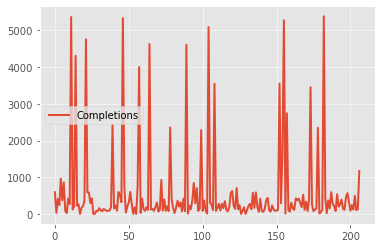

In [108]:
df[["Year", "Completions"]].plot()

<AxesSubplot:xlabel='Year', ylabel='Completions'>

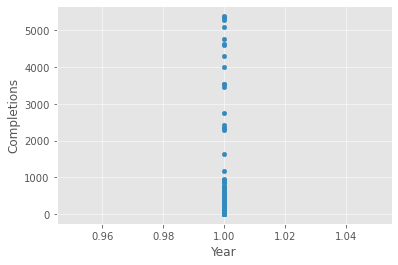

In [109]:
df.plot(x='Year', y='Completions', kind='scatter')

<AxesSubplot:>

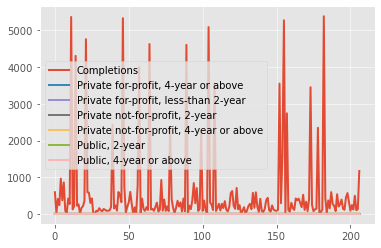

In [110]:
df.plot()

<AxesSubplot:>

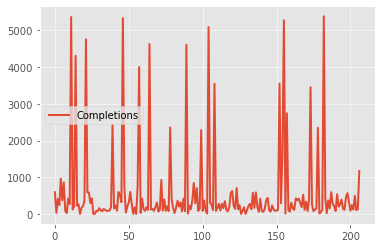

In [111]:
df.plot(y='Completions')

# Employees dataset

In [112]:
df_employees = pd.read_csv("data/employees.csv").dropna(how="all")
df_employees.head(n=3)

,First Name,Gender,...,Senior Management,Team
0,Douglas,Male,...,True,Marketing
1,Thomas,Male,...,True,NaN
2,Maria,Female,...,False,Finance


<span style="color:green"><u>Replace: </u></span>

In [113]:
print(f"Before:\n{df_employees['Team'].value_counts()}\n")

df_employees['Team'].replace(['Sales','toto'], 'OTHER*******', inplace=True)

print(f"After:\n{df_employees['Team'].value_counts()}\n")

Before:
Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
Sales                    94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: Team, dtype: int64

After:
Client Services         106
Finance                 102
Business Development    101
Marketing                98
Product                  95
OTHER*******             94
Engineering              92
Human Resources          91
Distribution             90
Legal                    88
Name: Team, dtype: int64



<span style="color:green"><u>To datetime:</u></span>

In [114]:
# to_datetime 
# df_employees["Start Date"]      = df_employees.to_datetime(df["Start Date"])
# df_employees["Last Login Time"] = df_employees.to_datetime(df["Last Login Time"])

# Or

df_employees = pd.read_csv("data/employees.csv",
                           parse_dates=["Start Date", "Last Login Time"]).dropna(how="all")

In [115]:
df_employees[df_employees["Start Date"].between("1991-01-01", "1992-01-01")].head(2)
df_employees[df_employees["Last Login Time"].between("08:30AM", "12:00PM")].head(2)

,First Name,Gender,...,Senior Management,Team
2,Maria,Female,...,False,Finance
7,NaN,Female,...,NaN,Finance


<span style="color:green"><u>String:</u></span>

In [116]:
df_employees['First Name'].str.lower().head(2)

0    douglas
1     thomas
Name: First Name, dtype: object

In [117]:
df_employees['First Name'].str.title().head(2)

0    Douglas
1     Thomas
Name: First Name, dtype: object

In [118]:
# Number of char per string 
df_employees['First Name'].str.len().head(2)

0    7.0
1    6.0
Name: First Name, dtype: float64

In [119]:
df_employees['First Name'].str.replace('Douglas', 'Celia').astype(object).head(2)

0     Celia
1    Thomas
Name: First Name, dtype: object

In [120]:
df_employees['First Name'].str.contains('Thomas').head(2)

0    False
1     True
Name: First Name, dtype: object

In [121]:
df_employees['First Name'].str.startswith('T').head(2)

0    False
1     True
Name: First Name, dtype: object

In [122]:
df_employees['First Name'].str.endswith('s').head(2)

0    True
1    True
Name: First Name, dtype: object

In [123]:
# Remove space 
# lstrip().str.rstrip() <=> strip()
df_employees['First Name'].str.lstrip().str.rstrip().head(2)

0    Douglas
1     Thomas
Name: First Name, dtype: object

In [124]:
df_employees['First Name'].str.split("g", expand=True, n=1).head(2)

,0,1
0,Dou,las
1,Thomas,None


<span style="color:green"><u>Concatenation:</u></span>

In [125]:
# df1 & df2 have the Same Structure
df1 = pd.read_csv("data/Restaurant - Week 1 Sales.csv").dropna(how="all")
df2 = pd.read_csv("data/Restaurant - Week 2 Sales.csv").dropna(how="all")

In [126]:
# When pd concats the 2 df, it will keep the same index, so use ignore_index
pd.concat([df1, df2], ignore_index=True).tail(1)

,Customer ID,Food ID
499,249,6


In [127]:
# pd.concat <=> append
df1.append(df2, ignore_index=True).tail(1)

,Customer ID,Food ID
499,249,6


In [128]:
pd.concat([df1, df2], ignore_index=False).tail(1)

,Customer ID,Food ID
249,249,6


In [129]:
# Which row, comes from which df ??
# <!> Remove ignore_index=True,
pd.concat([df1, df2], keys=["W1", "W2"])

Customer ID  Food ID
W1 0            537        9
   1             97        4
   2            658        1
   3            202        2
   4            155        9
...             ...      ...
W2 245          783       10
   246          556       10
   247          547        9
   248          252        9
   249          249        6

[500 rows x 2 columns]

<span style="color:green"><u>Merge:</u></span>

`How = ["inner" | "outer" | "left"]`

In [130]:
df1.merge(df2, how="inner", on="Customer ID")
df1.merge(df2, how="inner", on=["Customer ID", "Food ID"])
df1.merge(df2, how="inner", on="Customer ID", suffixes=["-Week1", "-Week2"]).head(3)

,Customer ID,Food ID-Week1,Food ID-Week2
0,537,9,5
1,155,9,3
2,155,1,3


In [131]:
# Outer Join <=> Union ou tout sauf le commun
df1.merge(df2, how="outer", on="Customer ID", indicator=True).head(10)
df1.merge(df2, how="outer", on="Customer ID", indicator=True)["_merge"].value_counts()
df1.merge(df2, how="outer", on="Customer ID", indicator=True).isin(["both"]).head(3)

,Customer ID,Food ID_x,Food ID_y,_merge
0,False,False,False,True
1,False,False,False,False
2,False,False,False,False


In [132]:
df1.merge(df2, how="left", on="Food ID",sort=True).head(2)

,Customer ID_x,Food ID,Customer ID_y
0,658,1,713
1,658,1,473


In [133]:
df1.head()

,Customer ID,Food ID
0,537,9
1,97,4
2,658,1
3,202,2
4,155,9


<span style="color:green"><u>Save:</u></span>

In [134]:
# Save DF to file.csv

df1.to_csv("saved_file.csv", index=False, columns=["Food ID", "Customer ID"], encoding="utf-8")

<span style="color:green"><u>Read Excel file:</u></span>

In [135]:
# Import and Export File
single_sheet = pd.read_excel("data/Data - Single Worksheet.xlsx")
single_sheet.head(2)

,First Name,Last Name,City,Gender
0,Brandon,James,Miami,M
1,Sean,Hawkins,Denver,M


In [136]:
# By, default, pd imports the first sheet
# the rest is ignored 
multiple_sheets = pd.read_excel("data/Data - Multiple Worksheets.xlsx")
multiple_sheets.head(2)

,First Name,Last Name,City,Gender
0,Brandon,James,Miami,M
1,Sean,Hawkins,Denver,M


In [137]:
# sheet_name: Name or Index 

multiple_sheets = pd.read_excel("data/Data - Multiple Worksheets.xlsx", sheet_name=1)
multiple_sheets.head(2)

,First Name,Last Name,City,Gender
0,Parker,Power,Raleigh,F
1,Preston,Prescott,Philadelphia,F


In [138]:
# Imports all the sheets in a dict 

# Better sheet_name = None 
multiple_sheets = pd.read_excel("data/Data - Multiple Worksheets.xlsx", sheet_name = ["Data 1", "Data 2"])
multiple_sheets["Data 1"]
multiple_sheets["Data 2"]

,First Name,Last Name,City,Gender
0,Parker,Power,Raleigh,F
1,Preston,Prescott,Philadelphia,F
2,Ronaldo,Donaldo,Bangor,M
3,Megan,Stiller,San Francisco,M
4,Bustin,Jieber,Austin,F


In [139]:
# An Excel export requires an ExcelWriter, which serves as a foundation for the workbook
excel_file = pd.ExcelWriter("Baby Names.xlsx")

f  = single_sheet[single_sheet.Gender == 'F']
m  = single_sheet[single_sheet.Gender == 'M']

f.to_excel(excel_file, sheet_name="f", index = False)
m.to_excel(excel_file, sheet_name="m", index = False)

excel_file.save()

<span style="color:green"><u>Apply:</u></span>

In [140]:
def classify_performance(number: int) -> str:
    return "OK" if number < 10000 else "KO"

In [141]:
df1["Food ID"].apply(lambda x : x / 100).value_counts().nunique()

8

In [142]:
df1["Food ID"].apply(classify_performance)

0      OK
1      OK
2      OK
3      OK
4      OK
       ..
245    OK
246    OK
247    OK
248    OK
249    OK
Name: Food ID, Length: 250, dtype: object

<span style="color:green"><u>Datetime:</u></span>

Pandas Timestamp Object ~ python datetime

In [143]:
birthday = dt.date(1995, 2, 23)
birthday.year, birthday.month, birthday.day

(1995, 2, 23)

In [144]:
dt.datetime(1995, 2, 23, 7, 13, 57), str(dt.datetime(1995, 2, 23, 7, 13, 57))
#.year, .month, .day, .hour, .minute, .second

(datetime.datetime(1995, 2, 23, 7, 13, 57), '1995-02-23 07:13:57')

In [145]:
pd.Timestamp("2015, 11, 11")
pd.Timestamp("2015/11/11 6:13:29 AM")

Timestamp('2015-11-11 06:13:29')

In [146]:
dates =["2015/11/11", "2015/11/12"]
pd.DatetimeIndex(dates), type(pd.DatetimeIndex(dates))

(DatetimeIndex(['2015-11-11', '2015-11-12'], dtype='datetime64[ns]', freq=None),
 pandas.core.indexes.datetimes.DatetimeIndex)

In [147]:
dates    = [dt.date(2015, 11, 11), dt.date(2015, 11, 12)]
dt_index = pd.DatetimeIndex(dates)

dt_index, type(pd.DatetimeIndex(dates))

(DatetimeIndex(['2015-11-11', '2015-11-12'], dtype='datetime64[ns]', freq=None),
 pandas.core.indexes.datetimes.DatetimeIndex)

In [148]:
pd.Series(data=[23, 34], index=dt_index)

2015-11-11    23
2015-11-12    34
dtype: int64

In [149]:
pd.to_datetime("2020-04-19")

Timestamp('2020-04-19 00:00:00')

In [150]:
pd.to_datetime(["2020-04-19", "2020/02/12", "July 4th, 1996"])
pd.to_datetime(dt.date(2015, 1, 1))
pd.to_datetime(dt.datetime(2015, 1, 1, 14, 35, 20))

Timestamp('2015-01-01 14:35:20')

In [151]:
data = pd.Series(["July 4th, 1996", "2020/02/12", "hello"])
pd.to_datetime(data, errors="coerce")

0   1996-07-04
1   2020-02-12
2          NaT
dtype: datetime64[ns]

In [152]:
pd.to_datetime([12345678, 345666543], unit="s")

DatetimeIndex(['1970-05-23 21:21:18', '1980-12-14 18:29:03'], dtype='datetime64[ns]', freq=None)

In [153]:
# freq = B (business days)
# freq = 3D
# freq = W
# freq = W-FRI
# freq = H, 6H (hour)
# freq = M, 2M (month)
# freq = MS
# freq = A (year)
t = pd.date_range(start="2020-01-03", end="2020-01-31", freq="2D")
t, type(t), type(t[0])

(DatetimeIndex(['2020-01-03', '2020-01-05', '2020-01-07', '2020-01-09',
                '2020-01-11', '2020-01-13', '2020-01-15', '2020-01-17',
                '2020-01-19', '2020-01-21', '2020-01-23', '2020-01-25',
                '2020-01-27', '2020-01-29', '2020-01-31'],
               dtype='datetime64[ns]', freq='2D'),
 pandas.core.indexes.datetimes.DatetimeIndex,
 pandas._libs.tslibs.timestamps.Timestamp)

In [154]:
pd.date_range(start="2020-01-03", periods=5, freq="B")

DatetimeIndex(['2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09'],
              dtype='datetime64[ns]', freq='B')

In [155]:
t = pd.date_range(end="2020-01-31", periods=10, freq="D")
df = pd.Series(t)
df.dt.is_quarter_start

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool